In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy as np
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.animation as anim

In [2]:
fname = "/Volumes/Turner2/FalseLowClouds/Model_Analysis/oaxaca_era5_feb22.nc"

ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:    (longitude: 113, latitude: 55, time: 6)
Coordinates:
  * longitude  (longitude) float32 -109.0 -108.8 -108.5 ... -81.5 -81.25 -81.0
  * latitude   (latitude) float32 23.9 23.65 23.4 23.15 ... 10.9 10.65 10.4
  * time       (time) datetime64[ns] 2023-02-22T01:00:00 ... 2023-02-22T06:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-09 21:22:22 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

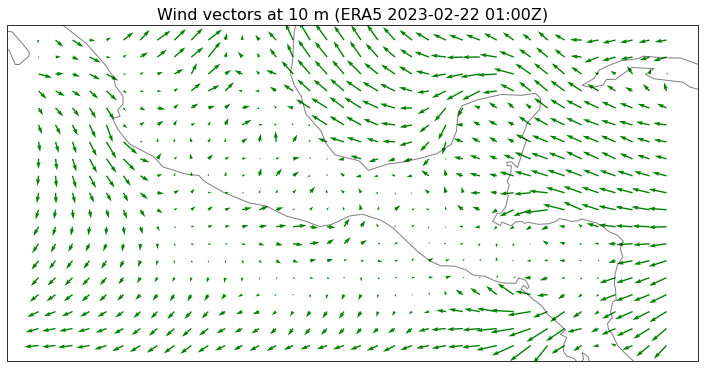

In [3]:
proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(10,5), subplot_kw=dict(projection=proj), constrained_layout=True)

time = ds['time'][0].values
date_str = str(time)[0:10]
time_str = str(time)[11:16]

X, Y = np.meshgrid(ds['longitude'], ds['latitude'])
X = X[0:len(ds['latitude']):3,0:len(ds['longitude']):3]
Y = Y[0:len(ds['latitude']):3,0:len(ds['longitude']):3]
U = ds['u10'][0,:,:].values[0:len(ds['latitude']):3,0:len(ds['longitude']):3]
V = ds['v10'][0,:,:].values[0:len(ds['latitude']):3,0:len(ds['longitude']):3]

ax.set_title('Wind vectors at 10 m (ERA5 '+date_str+' '+time_str+'Z)', fontsize=16)
q = ax.quiver(X, Y, U, V, transform=ccrs.PlateCarree(), color="g", width=0.002, scale_units='xy', scale=10)
ax.coastlines('110m', alpha=0.5)

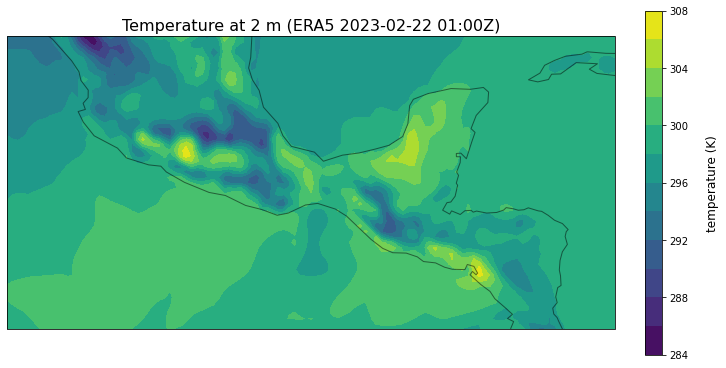

In [8]:
proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(10,5), subplot_kw=dict(projection=proj), constrained_layout=True)

ax.coastlines('110m', alpha=0.5)

time = ds['time'][0].values
date_str = str(time)[0:10]
time_str = str(time)[11:16]
ax.set_title('Temperature at 2 m (ERA5 '+date_str+' '+time_str+'Z)', fontsize=16)

con_era = ax.contourf(ds['longitude'], ds['latitude'], ds['t2m'][0], levels=11)

cbar0 = fig.colorbar(con_era, ax=ax, orientation='vertical')
cbar0.set_label('temperature (K)', fontsize=12, labelpad=18)

MovieWriter ffmpeg unavailable; using Pillow instead.


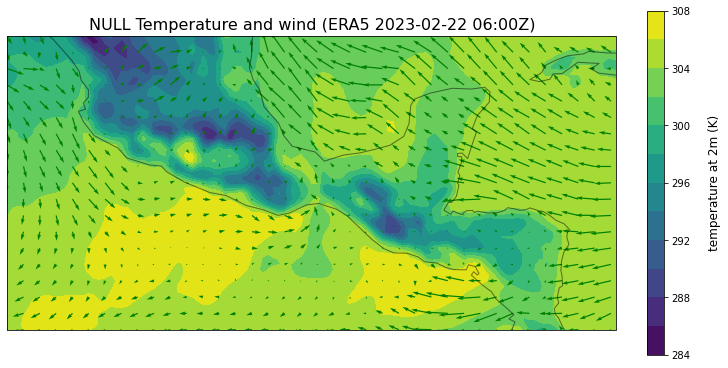

In [12]:
proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(10,5), subplot_kw=dict(projection=proj), constrained_layout=True)

X, Y = np.meshgrid(ds['longitude'], ds['latitude'])
X = X[0:len(ds['latitude']):3,0:len(ds['longitude']):3]
Y = Y[0:len(ds['latitude']):3,0:len(ds['longitude']):3]

def animate(i):
    time = ds['time'][i].values
    time_str = str(time)[11:16]
    ax.clear()
    ax.coastlines('110m', alpha=0.5)
    ax.set_title('NULL Temperature and wind (ERA5 '+date_str+' '+time_str+'Z)', fontsize=16)
    con_era = ax.contourf(ds['longitude'], ds['latitude'], ds['t2m'][i], levels=11)
    U = ds['u10'][i,:,:].values[0:len(ds['latitude']):3,0:len(ds['longitude']):3]
    V = ds['v10'][i,:,:].values[0:len(ds['latitude']):3,0:len(ds['longitude']):3]
    q = ax.quiver(X, Y, U, V, transform=ccrs.PlateCarree(), color='g', width=0.002, scale_units='xy', scale=10)

cbar = fig.colorbar(con_era, ax=ax, orientation='vertical')
cbar.set_label('temperature at 2m (K)', fontsize=12, labelpad=18)

animation = anim.FuncAnimation(fig, animate, frames=len(ds['t2m']), interval=200, repeat=True, blit=False)

animation.save('oaxaca_feb22_tempwind_combo.gif', fps=2)